In [7]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('decrochage_scolaire_clean.csv')
X = df.drop('risque', axis=1)
y = df['risque']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)


C:\Users\kabey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.3).astype(int)  # seuil abaissé pour capter plus de classe minoritaire


              precision    recall  f1-score   support

           0       0.83      0.27      0.40      1276
           1       0.14      0.70      0.24       224

    accuracy                           0.33      1500
   macro avg       0.49      0.48      0.32      1500
weighted avg       0.73      0.33      0.38      1500



<Axes: >

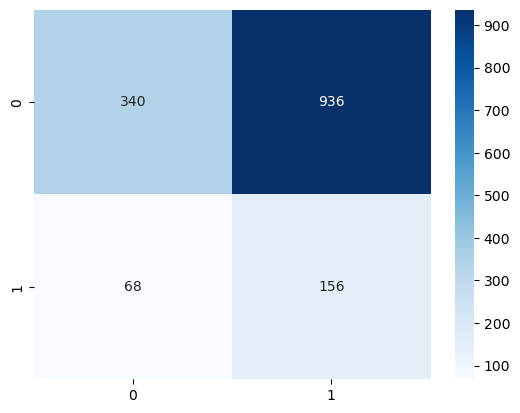

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


C:\Users\kabey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.27      0.40      1276
           1       0.14      0.70      0.24       224

    accuracy                           0.33      1500
   macro avg       0.49      0.48      0.32      1500
weighted avg       0.73      0.33      0.38      1500



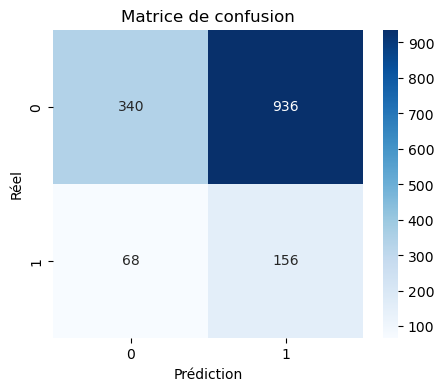

In [13]:
import pandas as pd

df = pd.read_csv('decrochage_scolaire_clean.csv')
X = df.drop('risque', axis=1)
y = df['risque']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.3).astype(int)  # seuil abaissé pour mieux capter les élèves à risque
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()
